# <font color=white>06. Regressão Linear Simples</font>
---

<img src="https://letscode.com.br/images/logoLcPng.png" width="250px" style="position: absolute; top: 5px; right: 20px; border-radius: 5px;" />

## Roteiro da Aula

1. Correlação vs Regressão Linear
2. Regressão Linear: Conceitos Iniciais
3. Entendendo a regressão linear na prática
4. Como encontrar a reta de regressão ideal? (Minimizando o erro)
5. Exemplo prático: Peso e Altura  
    - Conhecendo as bibliotecas: `sklearn` e `statsmodels`  
    - Modelo com a presença de outliers  
6. Características do Erro
7. Métricas para Análise dos Erros

---

## 1. Correlação vs Regressão Linear

| Correlação | Regressão |
|:----------:|:---------:|
| Mede o grau de relação entre duas variáveis | Uma variável afeta a outra |
| Grau de interelação | Baseada em causalidade (~Relação~ → Causa e efeito) |
| $\rho(x,y)$ = $\rho(y,x)$ | Unidirecional |
| Único ponto | Linha |

### $\Rightarrow$ Correlação não implica em causalidade!

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 2. Regressão Linear: Conceitos iniciais

Vejamos a importância da escolha do coeficiente ideal na prática...

In [2]:
x = np.arange(6)

In [3]:
x

array([0, 1, 2, 3, 4, 5])

In [4]:
y = x

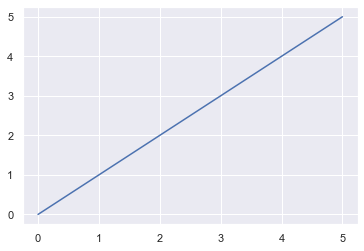

In [5]:
# beta_0 = 0
# beta_1 = 1
plt.plot(x,y);

### Equação da reta de regressão

$$
y = \beta_1x + \beta_0
$$

- $\beta_1$: coeficiente que multiplica a variavel independente  
- $\beta_0$: intercepto (coeficiente livre)

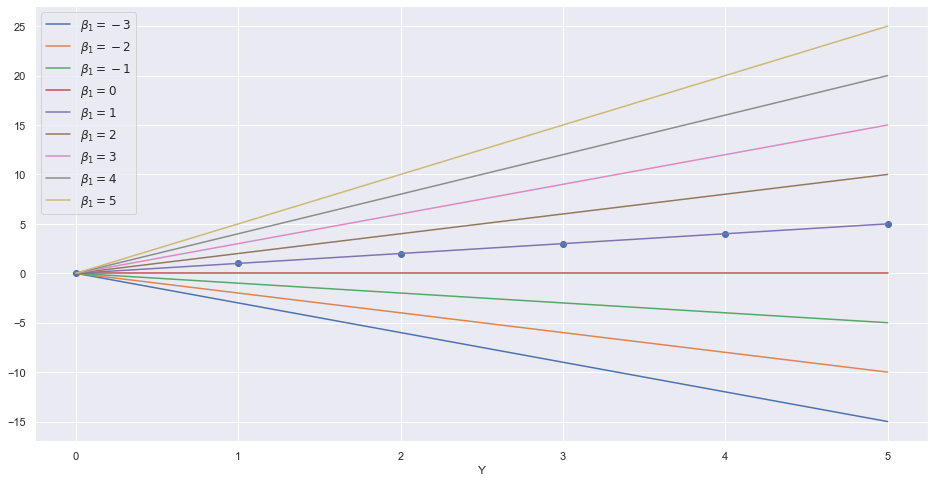

In [6]:
# Coeficiente x EQM
coef_erro = []

b0 = 0

plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.xlabel('X')
plt.xlabel('Y')

for b1 in range(-3,6):
    y_est = x * b1 + b0

    plt.plot(x, y_est, label=f'$\\beta_1 = {b1}$')

    # Soma dos quarados dos erros (resíduos) 
    SQE = sum((y - y_est)**2)  
    # Erro médio quadrático
    EQM = SQE / len(y)

    coef_erro.append([b1,EQM])

plt.legend(fontsize=12);

No nosso caso, $y = x$, então, $\beta_0 = 0$, $\beta_1 = 1$.

In [7]:
coef_eqm = np.array(coef_erro)
coef_eqm

array([[ -3.        , 146.66666667],
       [ -2.        ,  82.5       ],
       [ -1.        ,  36.66666667],
       [  0.        ,   9.16666667],
       [  1.        ,   0.        ],
       [  2.        ,   9.16666667],
       [  3.        ,  36.66666667],
       [  4.        ,  82.5       ],
       [  5.        , 146.66666667]])

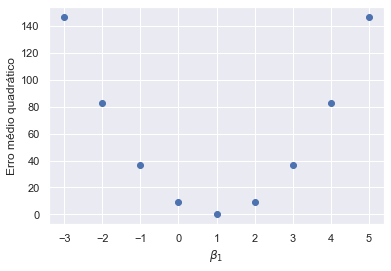

In [8]:
plt.scatter(x = coef_eqm[:, 0], y = coef_eqm[:,1])
plt.xlabel('$\\beta_1$');
plt.ylabel('Erro médio quadrático');

### Calculando os coeficientes $\beta_0$ e $\beta_1$ por meio das equações

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [9]:
x , y

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [10]:
# media amostral
x_mean = x.mean()
x_mean

2.5

In [11]:
# media amostral
y_mean = y.mean()
y_mean

2.5

In [12]:
x - x_mean, y- y_mean

(array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5]),
 array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5]))

In [13]:
numerador = sum((x - x_mean) * (y- y_mean))

In [14]:
denominador = sum((x - x_mean)**2)

In [15]:
beta_1 = numerador / denominador
beta_1

1.0

In [16]:
beta0 = y_mean - (beta_1 * x_mean)
beta0

0.0

## Regressão Linear Simples: Altura $\Rightarrow$ Peso

In [17]:
df = pd.read_csv('dataset/28c52b9b-6c44-406b-9f67-a297e1193365.csv')

In [18]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Conversão das unidades

In [19]:
df['altura'] = df.Height * 2.54
df['peso'] = df.Weight * 0.453592
df = df[['Gender','altura','peso']]

In [20]:
df.head()

,Gender,altura,peso
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


### Visualização gráfica

<AxesSubplot:xlabel='altura', ylabel='peso'>

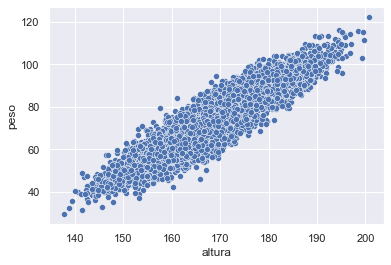

In [21]:
sns.scatterplot(data=df, x='altura', y='peso')

### Calculando a correlação entre as features

In [22]:
from scipy.stats import pearsonr

In [23]:
pearsonr(df['altura'], df['peso'])

(0.9247562987409147, 0.0)

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [24]:
x = df['altura']
y = df['peso']

In [25]:
x_mean = df['altura'].mean()
y_mean = df['peso'].mean()
x_mean, y_mean

(168.57360177724604, 73.22805433651767)

In [26]:
numerador = sum((x - x_mean) * (y- y_mean))
denominador = sum((x - x_mean)**2)
numerador , denominador

(1316085.0759109946, 954965.3347672354)

In [27]:
beta1 = numerador / denominador
beta1

1.3781495809287978

In [28]:
beta0 = y_mean - (beta1 * x_mean)
beta0

-159.091584308452

In [29]:
y_est = x * beta1 + beta0

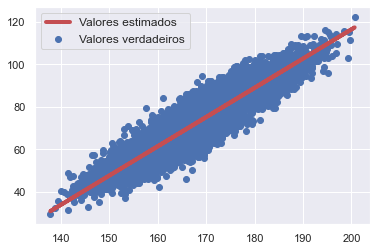

In [30]:
plt.scatter(df['altura'], df['peso'], label='Valores verdadeiros') # Valores verdadeiros
plt.plot(df['altura'], y_est, linewidth=4, color='r', label='Valores estimados') # Valores estimados
plt.legend(fontsize=12);

### Scikit Learn

In [31]:
!pip install -U sklearn

In [32]:
X = df['altura']
y = df['peso']

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[187.57142322 174.70603628 188.2396677  ... 162.22470022 175.34697755
 157.33838453].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X.values.reshape(-1,1)

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

In [ ]:
lr.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [ ]:
df[['altura']].head()

,altura
0,187.571423
1,174.706036
2,188.239668
3,182.196685
4,177.499761


In [ ]:
df[['altura']].values

array([[187.57142322],
       [174.70603628],
       [188.2396677 ],
       ...,
       [162.22470022],
       [175.34697755],
       [157.33838453]])

In [ ]:
X = df[['altura']]

In [ ]:
# Treinou o modelo (calculou os coefs)
lr.fit(X, y) 

LinearRegression()

In [ ]:
# array com os coefs que multiplicam o X
lr.coef_ # Beta 1

array([1.37814958])

In [ ]:
beta1

1.3781495809287978

In [ ]:
# intercepto (beta0)
lr.intercept_ , beta0

(-159.09158430845065, -159.091584308452)

In [ ]:
y_est = lr.coef_[0] * x + lr.intercept_
y_est

0        99.409894
1        81.679466
2       100.330835
3        92.002701
4        85.529638
           ...    
9995     72.545780
9996     75.676986
9997     64.478318
9998     82.562779
9999     57.744244
Name: altura, Length: 10000, dtype: float64

In [ ]:
lr.predict([[150],[180]])

array([47.63085283, 88.97534026])

In [ ]:
lr.predict([[i] for i in [150,180,200]])

array([ 47.63085283,  88.97534026, 116.53833188])

In [ ]:
y_pred = lr.predict(X)
y_pred

array([ 99.409894  ,  81.67946637, 100.33083484, ...,  64.47831832,
        82.56277932,  57.7442444 ])

In [ ]:
lr.predict([[150]])

array([47.63085283])

---

### Statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:19:22   Log-Likelihood:                -31313.
No. Observations:               10000   AIC:                         6.263e+04
Df Residuals:                    9998   BIC:                         6.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.0916      0.958   -166.109      0.000    -160.969    -157.214
altura         1.3781      0.006    242.975      0.000       1.367       1.389
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Influência dos Outliers

### Obtendo apenas 100 amostras (como array)

In [44]:
X = df['altura'].values[:100]
y = df['peso'].values[:100]
X.shape , y.shape

((100,), (100,))

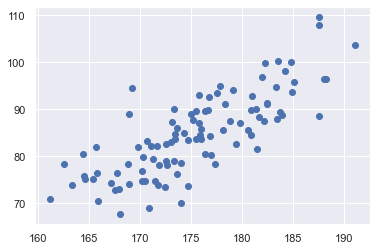

In [ ]:
plt.scatter(X, y)

### Modelo sem a presença dos outliers

In [45]:
lr = LinearRegression().fit(X.reshape(-1,1), y)

In [46]:
lr.coef_, lr.intercept_

(array([1.04495271]), -98.52075866207379)

In [47]:
y_est = lr.predict(X.reshape(-1,1))
y_est

array([ 97.48250832,  84.03878736,  98.18079219,  91.8661612 ,
        86.95809809,  79.98084264,  84.04722024,  82.88849624,
        79.35958931,  69.9041911 ,  90.44459275,  91.62682508,
        73.38072921,  85.36897221,  85.26456244,  81.02288431,
        93.69048048,  71.27860969,  86.31648737,  81.79361875,
        81.73800131,  85.78400572,  77.05093666, 101.08942358,
        81.67999725,  82.34576233,  84.85555119,  94.70577566,
        80.42734628,  83.28104903,  83.60404996,  97.97828418,
        91.3279934 ,  85.09583322,  86.14965217,  88.33597053,
        84.81982524,  79.8229391 ,  76.1436947 ,  72.15412323,
        81.89535711,  93.08296348,  74.71847938,  76.89446059,
        80.66377859,  87.54995471,  82.63189259,  93.03859397,
        85.09502773,  94.8902853 ,  73.42386984,  87.75900756,
        83.26787075,  80.18737816,  79.28525746,  77.98100891,
        82.90054922,  89.32738683,  90.49911328,  87.30730718,
        90.99613116,  86.08277408,  97.40691075,  79.30

In [48]:
residuos = y - y_est # erros da regressão
residuos[:10]

array([ 12.23847679, -10.41605551,  -1.68324204,   7.94334299,
         6.64052067, -10.93862649,  -0.61900139,  -6.69814429,
         0.44059742,   1.03745092])

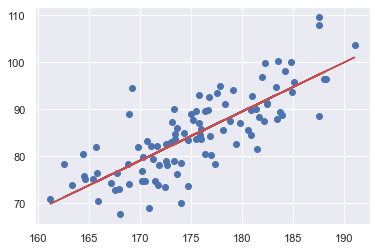

In [53]:
plt.scatter(X, y)
plt.plot(X, y_est, color='r')

### Modelo com a presença dos outliers

In [54]:
X2 = np.append(X, [150, 140, 173])
y2 = np.append(y, [200, 100, 250])

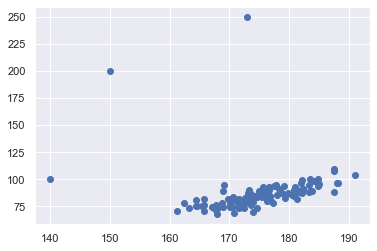

In [55]:
plt.scatter(X2, y2)

In [56]:
lr2 = LinearRegression().fit(X2.reshape(-1,1), y2)

In [57]:
lr2.coef_, lr2.intercept_


(array([0.13487779]), 64.05035131391786)

In [58]:
y_est2 = lr2.predict(X2.reshape(-1,1))
y_est2[:10]

array([89.34956993, 87.614315  , 89.43970127, 88.62463715, 87.99112648,
       87.09053378, 87.61540348, 87.46584061, 87.0103452 , 85.789885  ])

In [59]:
residuos2 = y2 - y_est2 # erros da regressão
residuos2[:10]

array([ 20.37141518, -13.99158315,   7.05784888,  11.18486704,
         5.60749229, -18.04831763,  -4.18718463, -11.27548866,
        -7.21015847, -14.84824299])

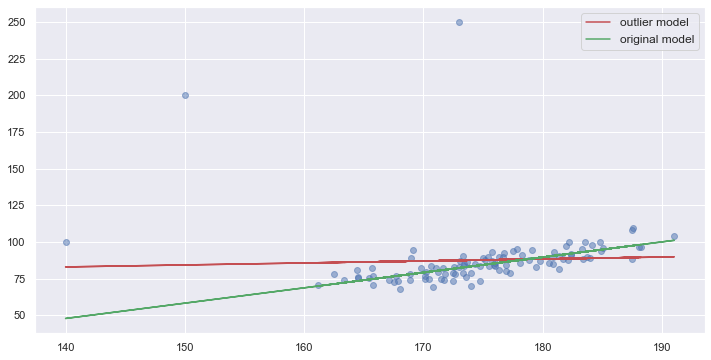

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(X2, y2, alpha=0.5)
plt.plot(X2, y_est2, color='r', label='outlier model')
plt.plot(X2, lr.predict(X2.reshape(-1,1)), color='g', label='original model')
plt.legend(fontsize=12);

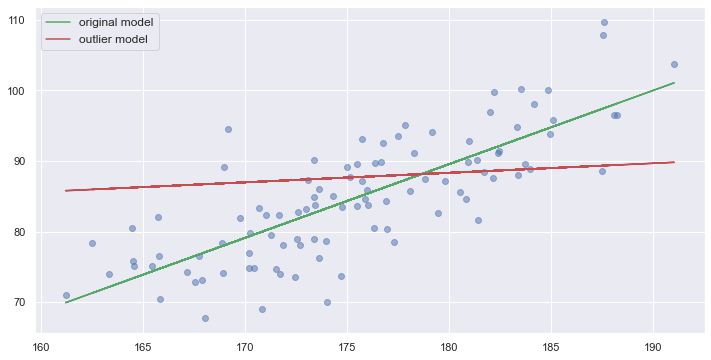

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_est, color='g', label='original model')
plt.plot(X, lr2.predict(X.reshape(-1,1)), color='r', label='outlier model')
plt.legend(fontsize=12);

## Características dos Resíduos

#### 1. Não devem ser correlacionados

#### Sem outliers

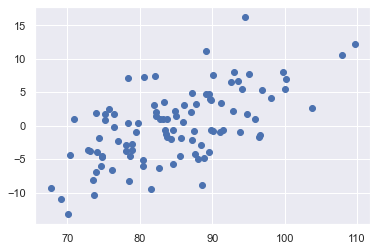

In [62]:
plt.scatter(y, residuos)

#### Com outliers

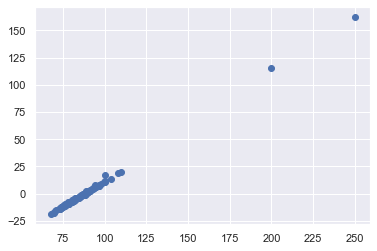

In [63]:
plt.scatter(y2, residuos2)

### 2. Ter média zero

#### Sem outliers

In [64]:
residuos.mean()

2.4442670110147446e-14

#### Com outliers

In [65]:
residuos2.mean()

1.9867602708631928e-14

### 4. Distribuição normal dos resíduos

#### Sem outliers

<AxesSubplot:ylabel='Count'>

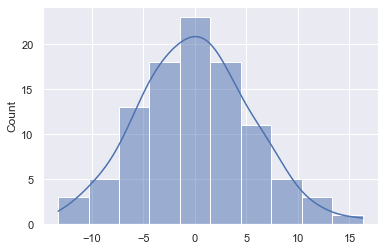

In [66]:
sns.histplot(residuos, kde=True)

#### Com outliers

<AxesSubplot:ylabel='Count'>

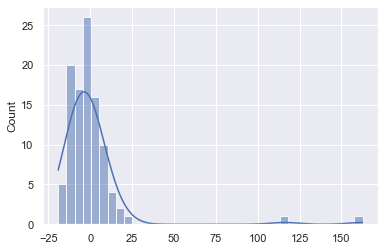

In [67]:
sns.histplot(residuos2, kde=True)

## Métricas para Análise dos Erros

$$
SQE = \sum_{i=1}^N \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQR = \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQT = \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQE}{SQT} = \frac{SQR}{SQT}
$$

In [68]:
from sklearn.metrics import r2_score as rs

In [69]:
rs(y, y_est)

0.6214261131940764

In [80]:
y2_est = lr2.predict(X2.reshape(-1,1))

In [81]:
rs(y2, y2_est)

0.002364899723618308

In [74]:
lr.score(X.reshape(-1,1), y)  #r2_score

0.6214261131940764

### 2. MAE

In [78]:
from sklearn.metrics import mean_absolute_error

In [79]:
mean_absolute_error(y, y_est)

4.260493303495108

In [82]:
mean_absolute_error(y2, y2_est)

9.640274384813585

### 3. MSE

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y, y_est)

28.728718184843018

In [85]:
mean_squared_error(y2, y2_est)

460.66295293941766

### 4. RMSE

In [86]:
np.sqrt(mean_squared_error(y, y_est))

5.3599177404922

In [87]:
np.sqrt(mean_squared_error(y2, y2_est))

21.463060195121702

### 5. RMSLE

In [88]:
from sklearn.metrics import mean_squared_log_error as mslr

In [89]:
mslr(y, y_est)

0.003965422358995943

In [90]:
mslr(y2, y2_est)

0.02794030725765539

### No Sklearn...